## GROUP N°

## NAMES 

In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---------------------------------------  11.3/11.3 MB 78.1 MB/s eta 0:00:01
   ---------------------------------------- 11.3/11.3 MB 54.6 MB/s eta 0:00:00

   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   -------------------------- ------------- 2/3 [pandas]
   ------------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install pyarrow

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/26.2 MB ? eta -:--:--
   --------------- ------------------------ 10.5/26.2 MB 73.0 MB/s eta 0:00:01
   ---------------------------------------  26.2/26.2 MB 87.4 MB/s eta 0:00:01
   ---------------------------------------- 26.2/26.2 MB 72.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import other libraries when needed 

## 1. DATA PROCESSING

In [2]:
# Load raw data
df = pd.read_parquet("dataDumper.parquet")

In [3]:
df.head()

,Time_utc,VehicleName,VehicleType,Pressure_Pa_1,Pressure_Pa_2,Pressure_Pa_3,Pressure_Pa_4,Pressure_Pa_5,Pressure_Pa_6,Temperature_K_1,...,Altitude_m,Speed_mps,epsilonX,epsilonY,epsilonZ,epsilonSpeed,AtmosphericPressure_Pa,dt_s,dd_m,RatioPayload
0,2023-01-01 00:00:00.328,C-132,Dumper,993010.933333,1.003995e+06,856000.0,798005.466667,819994.533333,864994.533333,346.15,...,4581.000000,9.003,6.207,6.312,23.000000,0.0,59002.557667,4.912,41.480140,0.0
1,2023-01-01 00:00:05.338,C-132,Dumper,993177.933329,1.003911e+06,856000.0,798088.966665,819911.033335,864911.033335,346.15,...,4577.600098,9.003,6.393,6.797,27.600000,0.0,59028.296172,5.010,45.952211,0.0
2,2023-01-01 00:00:10.331,C-132,Dumper,993344.366669,1.003828e+06,856000.0,798172.183334,819827.816666,864827.816666,346.15,...,4573.000000,9.723,6.721,7.631,32.200001,0.0,59064.789917,4.993,47.007842,0.0
3,2023-01-01 00:00:15.325,C-132,Dumper,993510.833331,1.003745e+06,856000.0,798255.416666,819744.583334,864744.583334,346.15,...,4568.600098,9.620,6.361,6.504,23.000000,0.0,59101.596928,4.994,48.700870,0.0
4,2023-01-01 00:00:20.448,C-132,Dumper,993681.600000,1.003659e+06,856000.0,798340.800000,819659.200000,864659.200000,346.15,...,4564.500000,11.318,6.361,7.144,23.000000,0.0,59139.354701,5.123,52.675397,0.0


In [4]:
df.columns

Index(['Time_utc', 'VehicleName', 'VehicleType', 'Pressure_Pa_1',
       'Pressure_Pa_2', 'Pressure_Pa_3', 'Pressure_Pa_4', 'Pressure_Pa_5',
       'Pressure_Pa_6', 'Temperature_K_1', 'Temperature_K_2',
       'Temperature_K_3', 'Temperature_K_4', 'Temperature_K_5',
       'Temperature_K_6', 'ColdPressure_Pa_1', 'ColdPressure_Pa_2',
       'ColdPressure_Pa_3', 'ColdPressure_Pa_4', 'ColdPressure_Pa_5',
       'ColdPressure_Pa_6', 'Latitude_dd', 'Longitude_dd', 'Altitude_m',
       'Speed_mps', 'epsilonX', 'epsilonY', 'epsilonZ', 'epsilonSpeed',
       'AtmosphericPressure_Pa', 'dt_s', 'dd_m', 'RatioPayload'],
      dtype='object')

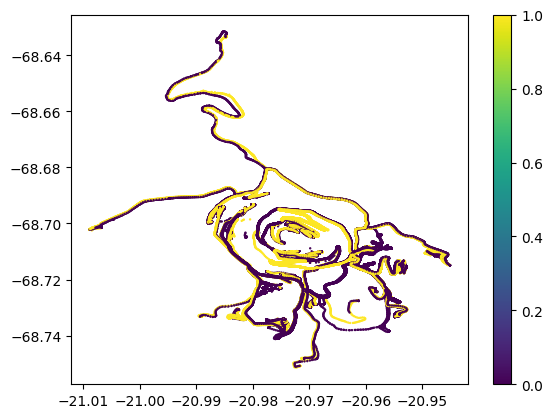

In [13]:
plt.scatter(x = df['Latitude_dd'], y = df['Longitude_dd'], s=0.5, c=df['RatioPayload'])
plt.colorbar()

In [6]:
plot = df[['Longitude_dd','Latitude_dd']]

## Trajectory Construction

In [7]:
# Create Segments based on  RatioPayLoad
df[['phaseNb']] = df[['RatioPayload']].diff().abs().cumsum()

In [24]:
#Split the data into loaded trajectories and empty trajectories
segment_list = [data_phase for _, data_phase in df.groupby('phaseNb')]
empty_segment_list = []
load_segment_list = []

for segment in segment_list:
    if segment.RatioPayload.mean() == 0.0:
        empty_segment_list.append(segment)
    elif segment.RatioPayload.mean() == 1.0:
        load_segment_list.append(segment)

In [9]:
print(f'N° of Loaded segments :{len(load_segment_list)}')
print(f'N° of Empty segments :{len(empty_segment_list)}')

N° of Loaded segments :263
N° of Empty segments :263


<Axes: xlabel='Latitude_dd', ylabel='Longitude_dd'>

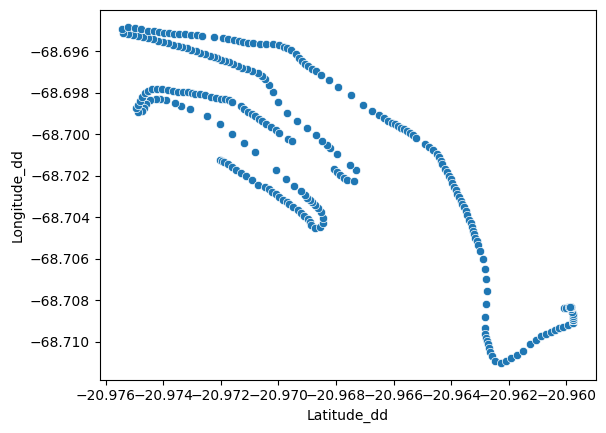

In [10]:
sns.scatterplot(x = load_segment_list[5]['Latitude_dd'],
                y = load_segment_list[5]['Longitude_dd'])

## 2. DATA ANALYSIS

Perform a comprehensive analysis of the dataset to uncover underlying patterns or characteristics. Visualize data distributions and relationships, such as speed vs. time, acceleration profiles, or geographical movements ... BE CURIOUS 

In [15]:
# ANALYSE THE MUTLIVARIATE TIME SERIES, TRY TO FIND PATTERNS AND CORRELATIONS INT THE DATA
# CHECK HOW THE DUMPER BEHAVES, SPEED, ACCELERATION, ... ETC
df['denivele'] = df['Altitude_m'].diff()
df.head()

,Time_utc,VehicleName,VehicleType,Pressure_Pa_1,Pressure_Pa_2,Pressure_Pa_3,Pressure_Pa_4,Pressure_Pa_5,Pressure_Pa_6,Temperature_K_1,...,epsilonX,epsilonY,epsilonZ,epsilonSpeed,AtmosphericPressure_Pa,dt_s,dd_m,RatioPayload,phaseNb,denivele
0,2023-01-01 00:00:00.328,C-132,Dumper,993010.933333,1.003995e+06,856000.0,798005.466667,819994.533333,864994.533333,346.15,...,6.207,6.312,23.000000,0.0,59002.557667,4.912,41.480140,0.0,NaN,NaN
1,2023-01-01 00:00:05.338,C-132,Dumper,993177.933329,1.003911e+06,856000.0,798088.966665,819911.033335,864911.033335,346.15,...,6.393,6.797,27.600000,0.0,59028.296172,5.010,45.952211,0.0,0.0,-3.399902
2,2023-01-01 00:00:10.331,C-132,Dumper,993344.366669,1.003828e+06,856000.0,798172.183334,819827.816666,864827.816666,346.15,...,6.721,7.631,32.200001,0.0,59064.789917,4.993,47.007842,0.0,0.0,-4.600098
3,2023-01-01 00:00:15.325,C-132,Dumper,993510.833331,1.003745e+06,856000.0,798255.416666,819744.583334,864744.583334,346.15,...,6.361,6.504,23.000000,0.0,59101.596928,4.994,48.700870,0.0,0.0,-4.399902
4,2023-01-01 00:00:20.448,C-132,Dumper,993681.600000,1.003659e+06,856000.0,798340.800000,819659.200000,864659.200000,346.15,...,6.361,7.144,23.000000,0.0,59139.354701,5.123,52.675397,0.0,0.0,-4.100098


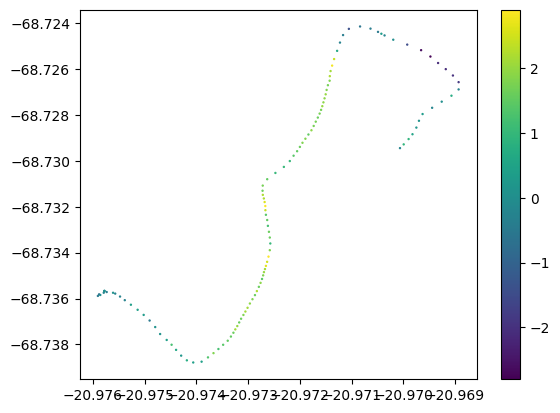

In [21]:
plt.scatter(x = load_segment_list[10]['Latitude_dd'], y = load_segment_list[10]['Longitude_dd'], s=0.5, c=load_segment_list[10]['denivele'])
plt.colorbar()

In [23]:
df['mean_temp_avant'] = (df['Temperature_K_1'] + df['Temperature_K_2'])/2
df['mean_temp_arriere'] = (df['Temperature_K_3'] + df['Temperature_K_4'] + df['Temperature_K_5'] + df['Temperature_K_6'])/4

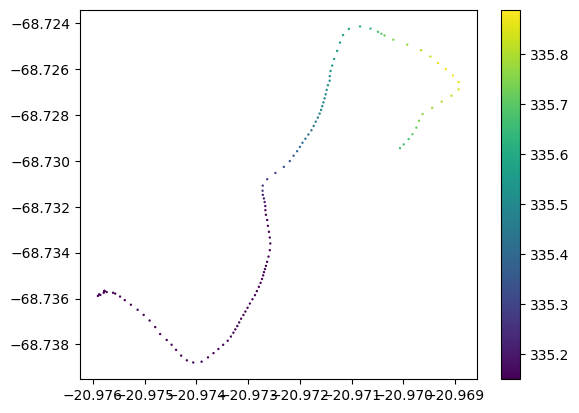

In [26]:
plt.scatter(x = load_segment_list[10]['Latitude_dd'], y = load_segment_list[10]['Longitude_dd'], s=0.5, c=load_segment_list[10]['mean_temp_arriere'])
plt.colorbar()

## 3. Distance Metrics for Trajectories 
Learn and apply suitable distance measures for trajectories. These may include Euclidean distance, Dynamic Time Warping (DTW), or Fréchet distance. Experiment with different metrics to find the most suitable one for clustering vehicle trajectories.
Trajectory Construction ( Based on the preprocessed data, construct trajectories that reflect the vehicle's movement over time. Define how you will represent a trajectory (e.g., as a series of time-stamped GPS coordinates or motion states).